<a href="https://colab.research.google.com/github/RobbS79/reads-excel-from-url/blob/portfolio/ReadStatsDataFor2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
import os
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

<h1>Reading names of .xlsx files from online available online, on website of Central office of labour, social affairs and family of SR</h1>

- connects to the url
- lists all 'a' tags which contains 'href' with a substring of '.xlsx'
  - they are links to access the .xlsx files with raw unemployment data


*Note - chceck, wheather only required files have suffix, which contains a substring of .xlsx

In [ ]:
url = "https://www.upsvr.gov.sk/statistiky/nezamestnanost-mesacne-statistiky/2020.html?page_id=971502"

soup = BeautifulSoup(requests.get(url).content, "html.parser")

linkages=[]
for link in soup.select('a[href*=".xls"]'):
    linkages.append(link["href"])

<h1>Development of an unemployment in required regions during 2020</h1>

- reads the files from list of .xlsx in variable 'linkages'
  - define required sheet of .xlsx file, rows and columns which we want to retrieve
- puts retrieved data into empty list 'container_of_files'
- concatonate them into a single data frame 'all_files'

In [ ]:
container_of_files = []

for link in linkages:
    raw_excel_data = pd.read_excel(link,sheet_name=2,header=None,usecols="A,O,M")

    required_region_data = raw_excel_data.iloc[71:85].rename(columns={0:"County",12:"Disponible jobseekers",14:"Unemployment rate"})
    focused_countys_year20 = required_region_data.loc[(required_region_data["County"] == "Bardejov") |
                                             (required_region_data["County"] == "Stará Ľubovňa") |
                                            (required_region_data["County"] == "Svidník") |
                                            (required_region_data["County"] == "Prešov")]

    container_of_files.append(focused_countys_year20)
    all_files = pd.concat(container_of_files,axis=0)

Retrieve unemployment data for each region

1) Bardejov and its monthly development of unemployment in the county in 2020

- reset the index and setting it to month name values

In [ ]:
unemployment_2020_BJ = all_files.loc[all_files['County'] == "Bardejov"]

unemployment_2020_BJ = unemployment_2020_BJ.reset_index()
unemployment_2020_BJ = unemployment_2020_BJ.drop(unemployment_2020_BJ.columns[[0]], axis=1).rename(columns={"Disponible jobseekers":"BJ","Unemployment rate":"BJ rate"})

unemployment_2020_BJ = unemployment_2020_BJ.set_index(pd.Series(["December", "November", "October", "September", "August", "July", "June", "May","April", "March", "February" ,"January"]))

2) Prešov

In [ ]:
unemployment_2020_PO = all_files.loc[all_files['County'] == "Prešov"]

unemployment_2020_PO = unemployment_2020_PO.reset_index()
unemployment_2020_PO = unemployment_2020_PO.drop(unemployment_2020_PO.columns[[0]], axis=1).rename(columns={"Disponible jobseekers":"PO","Unemployment rate":"PO rate"})

unemployment_2020_PO = unemployment_2020_PO.set_index(pd.Series(["December", "November", "October", "September", "August", "July", "June", "May","April", "March", "February" ,"January"]))

3) Stará Ľubovňa

In [ ]:
unemployment_2020_SL = all_files.loc[all_files['County'] == "Stará Ľubovňa"]

unemployment_2020_SL = unemployment_2020_SL.reset_index()
unemployment_2020_SL = unemployment_2020_SL.drop(unemployment_2020_SL.columns[[0]], axis=1).rename(columns={"Disponible jobseekers":"SL","Unemployment rate":"SL rate"})

unemployment_2020_SL = unemployment_2020_SL.set_index(pd.Series(["December", "November", "October", "September", "August", "July", "June", "May","April", "March", "February" ,"January"]))

4) Svidník

In [ ]:
unemployment_2020_SK = all_files.loc[all_files['County'] == "Svidník"]

unemployment_2020_SK = unemployment_2020_SK.reset_index()
unemployment_2020_SK = unemployment_2020_SK.drop(unemployment_2020_SK.columns[[0]], axis=1).rename(columns={"Disponible jobseekers":"SK","Unemployment rate":"SK rate"})

unemployment_2020_SK = unemployment_2020_SK.set_index(pd.Series(["December", "November", "October", "September", "August", "July", "June", "May","April", "March", "February" ,"January"]))

<h1> Numbers of disponible jobseekers according to each coutry throughout the year and average unemployment rate. </h1>

- concatonets data frames of each county into a single one
- derives an average unemployment rate for chosen regions

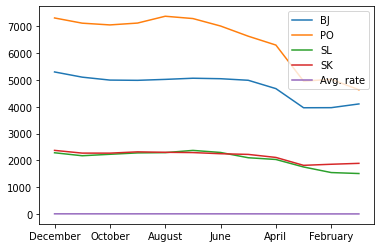

In [ ]:
r4_data = pd.concat([unemployment_2020_BJ,unemployment_2020_PO,unemployment_2020_SL,unemployment_2020_SK],axis=1)
r4_data = r4_data.drop(r4_data.columns[[0]], axis=1)
r4_data["Avg. rate"] = (r4_data['BJ rate']+r4_data['PO rate']+r4_data['SK rate']+r4_data['SL rate'])/4
r4_data = r4_data.drop(["BJ rate","PO rate","SL rate","SK rate"], axis=1)
r4_data
#r4_data.columns = pd.MultiIndex.from_product([['Disponible jobseekers'],names=["BJ","PO","SL","SK"] r4_data.columns])
r4_data.plot()

In [ ]:
numbers = [0, 1, 2]
colors = ['green', 'purple']
pd.MultiIndex.from_product([numbers, colors],
                           names=['number', 'color'])

MultiIndex([(0,  'green'),
            (0, 'purple'),
            (1,  'green'),
            (1, 'purple'),
            (2,  'green'),
            (2, 'purple')],
           names=['number', 'color'])